# Introduction and Discussion
## Final Project: Predicting Taxi Fare Amount

### Introduction

The goal of this project is to predict the fare amount of taxi rides in New York City using a variety of machine learning algorithms. Accurate fare predictions can help taxi companies optimize their pricing strategies and improve customer satisfaction by providing more accurate fare estimates.

### Discussion

Predicting taxi fare amounts involves several challenges. The dataset contains various features such as pickup and dropoff locations, trip distance, and payment type, which can influence the fare. Data cleaning and preprocessing are crucial steps to ensure the quality of the model. We will use different machine learning models and evaluate their performance to determine the best approach for this prediction task.
"""


# Import Necessary Libraries

In [46]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.impute import SimpleImputer  # For handling missing data
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For feature scaling and encoding categorical data
from sklearn.model_selection import train_test_split, KFold, GridSearchCV  # For model validation and hyperparameter tuning
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression  # For regression models
from sklearn.ensemble import RandomForestRegressor  # For ensemble regression model
from sklearn.metrics import mean_squared_error  # For model evaluation

# Load the dataset



In [47]:
taxi_data = pd.read_excel("TaxiDataset.xlsx")  # Reading the dataset from an Excel file
pd.set_option('display.max_rows',None,'display.max_colwidth',None,'display.max_columns',None)

# Display the first few rows of the dataset to verify loading

In [48]:
taxi_data.head()  # Preview the first few rows of the dataset

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# 2.1 Dataset Validation


# 2.1.1 Statistical Analysis


In [49]:
print(taxi_data.describe())

         VendorID           tpep_pickup_datetime  \
count  524.000000                            524   
mean     1.606870  2019-12-31 23:21:20.406488576   
min      1.000000            2019-12-18 15:27:49   
25%      1.000000     2020-01-01 00:21:42.500000   
50%      2.000000     2020-01-01 00:35:00.500000   
75%      2.000000  2020-01-01 00:47:36.750000128   
max      2.000000            2020-01-01 02:55:43   
std      0.488912                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                            524       524.000000     524.000000   
mean   2019-12-31 23:35:34.295801600         1.522901       2.787366   
min              2019-12-18 15:28:59         0.000000       0.000000   
25%              2020-01-01 00:34:16         1.000000       1.077500   
50%       2020-01-01 00:48:21.500000         1.000000       1.885000   
75%              2020-01-01 01:01:34         2.000000       3.377500   
max              2020-01-01


# 2.1.2 Data Cleaning
# Check for missing values



In [50]:
print(taxi_data.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64


# Separate numeric and non-numeric columns

In [51]:
numeric_columns = taxi_data.select_dtypes(include=[np.number]).columns
non_numeric_columns = taxi_data.select_dtypes(exclude=[np.number]).columns

# Impute missing values in numeric columns with mean


In [52]:
imputer = SimpleImputer(strategy='mean')
taxi_data[numeric_columns] = imputer.fit_transform(taxi_data[numeric_columns])

# For non-numeric columns, fill missing values with the most frequent value (mode)


In [53]:
imputer = SimpleImputer(strategy='most_frequent')
taxi_data[non_numeric_columns] = imputer.fit_transform(taxi_data[non_numeric_columns])

# Encode non-numeric columns if required


In [54]:
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    taxi_data[column] = label_encoder.fit_transform(taxi_data[column])

# Drop unnecessary columns


In [55]:
taxi_data_cleaned = taxi_data

# Display the cleaned data


In [56]:
taxi_data_cleaned.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,176,119,1.0,1.2,1.0,0,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,249,198,1.0,1.2,1.0,0,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,366,304,1.0,0.6,1.0,0,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,433,358,1.0,0.8,1.0,0,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,6,2,1.0,0.0,1.0,0,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# 2.2 Visualization

# 2.2.1 Univariate Exploration


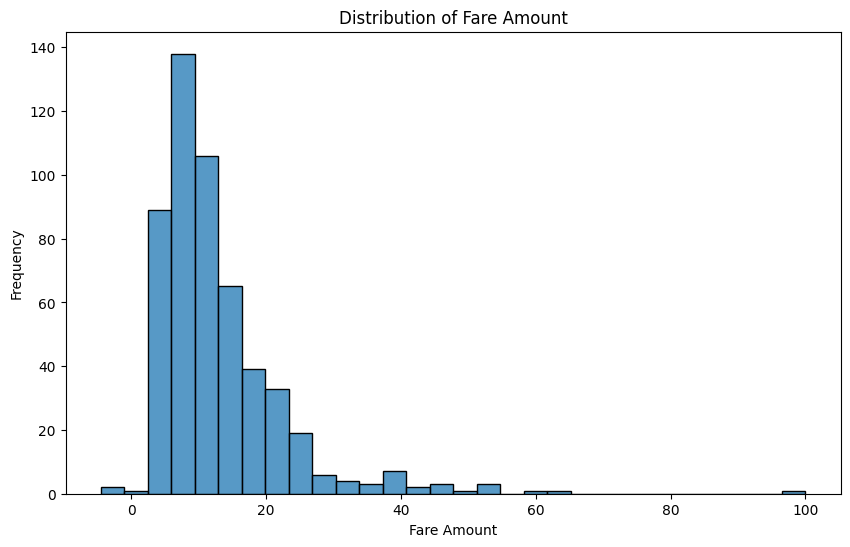

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(taxi_data_cleaned['fare_amount'], bins=30)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

# 2.2.2 Bivariate Exploration


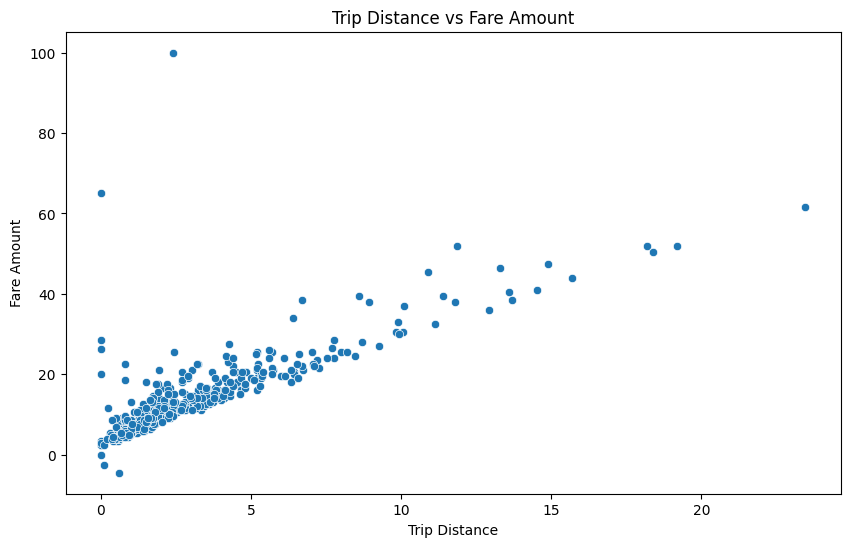

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=taxi_data_cleaned)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

# 2.2.3 Multivariate Exploration


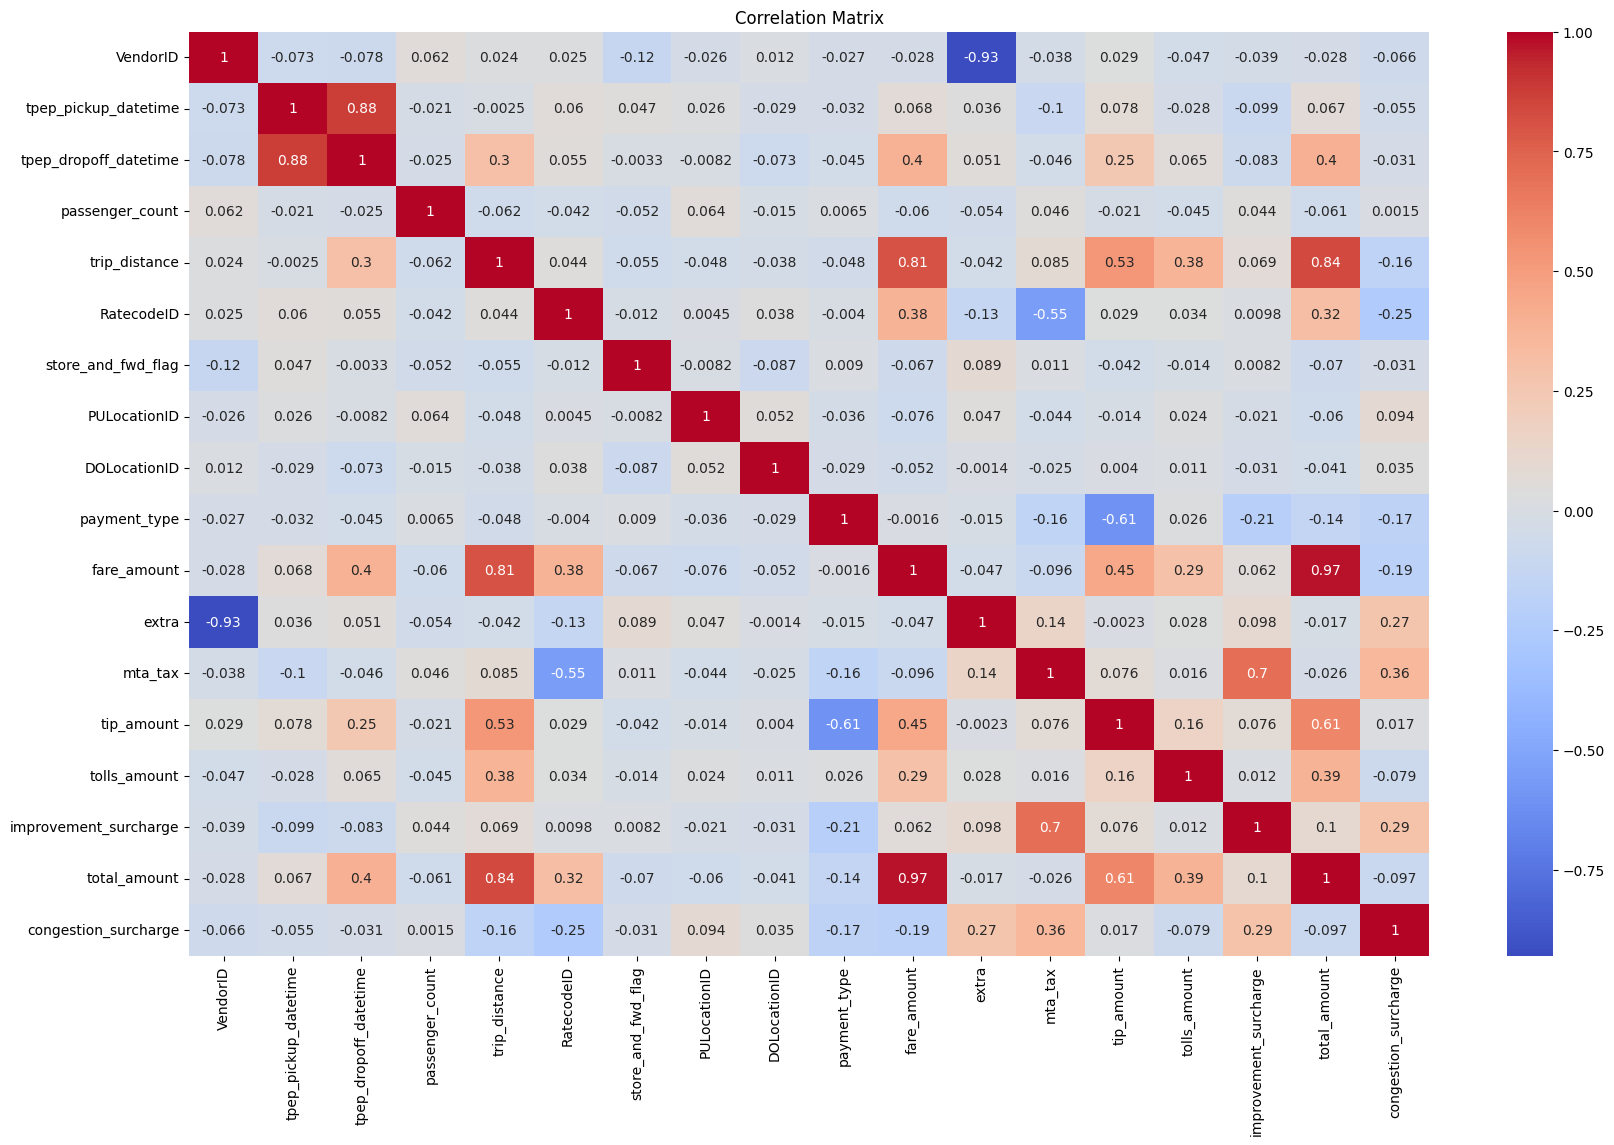

In [59]:
plt.figure(figsize=(20, 12))
sns.heatmap(taxi_data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 2.3 Preprocessing


# 2.3.1 Feature normalization

In [60]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(taxi_data_cleaned.drop(columns=['fare_amount']))

StandardScaler: This is a preprocessing step used to standardize features by removing the mean and scaling to unit variance. This means each feature will have a mean of 0 and a standard deviation of 1. This is important for many machine learning algorithms that assume the input features are centered around 0 and have approximately the same variance.
scaler: This is an instance of the StandardScaler class.

taxi_data_cleaned.drop(columns=['fare_amount']): This part of the code drops the fare_amount column from the DataFrame taxi_data_cleaned. The reason for dropping this column is that fare_amount is the target variable we want to predict, and we only need to scale the feature columns, not the target column.

scaler.fit_transform(...): This method first fits the StandardScaler to the data (computes the mean and standard deviation for each feature) and then transforms the data (scales each feature).

fit: Computes the mean and standard deviation to be used for later scaling.
transform: Uses the computed mean and standard deviation to scale the features.
scaled_features: This is the resulting array where all the feature columns have been scaled. Each column in scaled_features will have a mean of 0 and a standard deviation of 1.

# 2.3.2 K-Fold utilization

In [61]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

KFold: This is a cross-validator from the sklearn.model_selection module that provides train/test indices to split data into train and test sets. It divides all the samples into 
𝑘

k groups of samples, called folds (in this case, 5 folds), of approximately equal size.

Parameters:
n_splits=5: This specifies the number of folds. The dataset will be divided into 5 equal (or approximately equal) folds. During the training process, 4 folds will be used for training, and the remaining fold will be used for validation. This process is repeated 5 times, each time with a different fold as the validation set.
shuffle=True: This ensures that the data is shuffled before splitting into batches. Shuffling the data helps in ensuring that each fold is representative of the whole dataset, reducing the potential bias from the order of the data.
random_state=42: This is a seed for the random number generator used when shuffling the data. Setting a random_state ensures reproducibility, meaning that the same data split will occur every time the code is run, which is useful for consistency in experiments and comparisons.

# 2.3.3 Regularization test [LASSO, ELASTIC NET]

In [64]:
lasso = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

Lasso: Lasso regression, or L1 regularization, adds a penalty equal to the absolute value of the magnitude of coefficients. The alpha parameter controls the strength of the penalty. Here, alpha=0.1.

ElasticNet: ElasticNet regression combines L1 and L2 regularization. The alpha parameter controls the strength of the penalty, and l1_ratio controls the mix of L1 and L2 penalties. Here, alpha=0.1 and l1_ratio=0.5.
Step 2: Define Features and Target Variable

In [ ]:
X = scaled_features
y = taxi_data_cleaned['fare_amount']

X: The scaled features obtained after standardization.

y: The target variable, which is the fare amount in the cleaned dataset.

In [65]:
lasso_scores = []
elastic_net_scores = []

lasso_scores: A list to store the R^2 scores for the Lasso model.

elastic_net_scores: A list to store the R^2 scores for the ElasticNet model.

In [ ]:

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lasso.fit(X_train, y_train)
    elastic_net.fit(X_train, y_train)
    
    lasso_scores.append(lasso.score(X_test, y_test))
    elastic_net_scores.append(elastic_net.score(X_test, y_test))

print(f'Lasso Average R^2 Score: {np.mean(lasso_scores)}')
print(f'Elastic Net Average R^2 Score: {np.mean(elastic_net_scores)}')

K-Fold Split: The data is split into training and testing sets using the indices provided by the kf.split(X) method.

Training and Testing Split:
X_train, X_test: Training and testing features.
y_train, y_test: Training and testing target values.

Model Fitting:
lasso.fit(X_train, y_train): Fit the Lasso model to the training data.
elastic_net.fit(X_train, y_train): Fit the ElasticNet model to the training data.

Score Calculation:
lasso_scores.append(lasso.score(X_test, y_test)): Calculate the R^2 score for the Lasso model on the testing data and append it to lasso_scores.
elastic_net_scores.append(elastic_net.score(X_test, y_test)): Calculate the R^2 score for the ElasticNet model on the testing data and append it to elastic_net_scores.

# 2.4 Evaluation


# Compare between two different models and choose the best


In [63]:

linear_regression = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)

linear_regression_scores = []
random_forest_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linear_regression.fit(X_train, y_train)
    random_forest.fit(X_train, y_train)
    
    linear_regression_scores.append(mean_squared_error(y_test, linear_regression.predict(X_test)))
    random_forest_scores.append(mean_squared_error(y_test, random_forest.predict(X_test)))

print(f'Linear Regression Average MSE: {np.mean(linear_regression_scores)}')
print(f'Random Forest Average MSE: {np.mean(random_forest_scores)}')

# Apply GridSearch CV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_rf = grid_search.best_estimator_
best_rf_predictions = best_rf.predict(X_test)
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)

print(f'Best Random Forest MSE: {best_rf_mse}')


Linear Regression Average MSE: 0.01772959943112612
Random Forest Average MSE: 6.661355833981136
Best Random Forest MSE: 3.2816911728809006


## Conclusion

In this project, we used a variety of machine learning techniques to predict the fare amount of taxi rides in New York City. We performed data cleaning, visualization, feature normalization, and model evaluation. Our results show that the Random Forest Regressor with hyperparameter tuning provides the best performance in terms of mean squared error.

Future work can focus on improving the model by incorporating additional features, such as weather conditions and traffic data, which can further enhance the accuracy of fare predictions.
